# WeRateDogs datatset

In [1145]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt

## Step 1: Gathering Data


### The WeRateDogs Twitter archive


In [1146]:
df_twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [1147]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   float64
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1148]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427699e+17,7.455128e+17,2.015385e+16,7.720221e+17,1.241437e+16,13.126486,10.455433
std,6.856931e+16,7.583419e+16,1.253546e+17,6.236131e+16,9.597227e+16,45.876648,6.745237
min,6.660000e+17,6.660000e+17,1.185634e+07,6.660000e+17,7.832140e+05,0.000000,0.000000
25%,6.780000e+17,6.760000e+17,3.086374e+08,7.190000e+17,4.196984e+09,10.000000,10.000000
50%,7.200000e+17,7.035000e+17,4.196984e+09,7.800000e+17,4.196984e+09,11.000000,10.000000
75%,7.990000e+17,8.260000e+17,4.196984e+09,8.200000e+17,4.196984e+09,12.000000,10.000000
max,8.920000e+17,8.860000e+17,8.410000e+17,8.870000e+17,7.870000e+17,1776.000000,170.000000


In [1149]:
df_twitter_archive.head(1000)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.920000e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,8.920000e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,8.920000e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,8.920000e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,8.910000e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.480000e+17,NaN,NaN,2016-06-30 02:45:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""So... we meat again"" (I'm so sorry for that pun I couldn't resist pls don't unfollow) 10/10 https://t.co/XFBrrqapZa",NaN,NaN,NaN,https://twitter.com/dog_rates/status/748346686624440324/photo/1,10,10,None,None,None,None,None
996,7.480000e+17,NaN,NaN,2016-06-30 02:10:24 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",SWIM AWAY PUPPER SWIM AWAY 13/10 #BarkWeek https://t.co/QGGhZoTcwy,NaN,NaN,NaN,https://vine.co/v/h5aDaFthX6O,13,10,None,None,None,pupper,None
997,7.480000e+17,NaN,NaN,2016-06-30 01:15:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duke. He permanently looks like he just tripped over something. 11/10 https://t.co/1sNtG7GgiO,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/748324050481647620/photo/1,https://twitter.com/dog_rates/status/748324050481647620/photo/1",11,10,Duke,None,None,None,None
998,7.480000e+17,NaN,NaN,2016-06-30 00:09:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This sherk must've leapt out of the water and into the canoe, trapping the human. Won't even help paddle smh. 7/10 https://t.co/KubWEqOIgO",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/748307329658011649/photo/1,https://twitter.com/dog_rates/status/748307329658011649/photo/1",7,10,None,None,None,None,None


### The tweet image predictions
This file (image_predictions.tsv) is present in each tweet according to a neural network. It is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [1150]:
response= requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_prediction.tsv',mode='wb')as file:
    file.write(response.content)
df_tweet_image_predictions=pd.read_csv('image_prediction.tsv',delimiter='\t')

In [1151]:
df_tweet_image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1152]:
df_tweet_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Additional data from the Twitter API
Gather each tweet's retweet count and favorite ("like") count at the minimum and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

In [1153]:
consumer_key = 'hEY883fRpJTPRCvQIm19jARn5'
consumer_secret = 'ihkQn3piwEpSFdYt03DHh5USqtcqWBgGqs8wmAwctPqSAZPcFs'

access_token = '947559794369552386-HSN8FQau94rV651RbvHF0aVEidkUy8y'
access_secret = 'vSaaU4sn3rT1Wq6iHdOR0EBuzo3BLfbaCKU50PqMGWC9m'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

# as API is not accessible due to limitation in endpoints, the tweet_json.txt will be used

'''
Forbidden: 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product
'''


df_twitter_API=pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])
with open('tweet_json.txt','r')as file:
    for line in file:
        tweet_id,retweet_count,favorite_count=line[:-1].split(' ')
        df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_co

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_co

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_co

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_co

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_co

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_co

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_co

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_co

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_co

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_co

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_co

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_co

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_co

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_co

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_co

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_co

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_co

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2293031763.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_twitter_API=df_twitter_API.append({'tweet_id':tweet_id,'retweet_co

In [1154]:
df_twitter_API.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8836,39455
1,892177421306343426,6475,33767
2,891815181378084864,4296,25427
3,891689557279858688,8915,42831
4,891327558926688256,9708,40978


## Step 2: Assessing Data

In [1155]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   float64
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1156]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427699e+17,7.455128e+17,2.015385e+16,7.720221e+17,1.241437e+16,13.126486,10.455433
std,6.856931e+16,7.583419e+16,1.253546e+17,6.236131e+16,9.597227e+16,45.876648,6.745237
min,6.660000e+17,6.660000e+17,1.185634e+07,6.660000e+17,7.832140e+05,0.000000,0.000000
25%,6.780000e+17,6.760000e+17,3.086374e+08,7.190000e+17,4.196984e+09,10.000000,10.000000
50%,7.200000e+17,7.035000e+17,4.196984e+09,7.800000e+17,4.196984e+09,11.000000,10.000000
75%,7.990000e+17,8.260000e+17,4.196984e+09,8.200000e+17,4.196984e+09,12.000000,10.000000
max,8.920000e+17,8.860000e+17,8.410000e+17,8.870000e+17,7.870000e+17,1776.000000,170.000000


In [1157]:
df_twitter_archive.value_counts()

Series([], dtype: int64)

In [1158]:
#duplicated_df_twitter_archive = df_twitter_archive.duplicated(keep='last')

duplicated = df_twitter_archive[df_twitter_archive.duplicated()]

if len(duplicated):
    print(duplicated)
else:
    print('no duplicates')

no duplicates


In [1159]:
df_twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.920000e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,8.920000e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,8.920000e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


In [1160]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
20     2   
80     2   
70     1   
7      1   
15     1   
150    1   
170    1   
0      1   
90     1   
40     1   
130    1   
110    1   
16     1   
120    1   
2      1   
Name: rating_denominator, dtype: int64

In [1161]:
df_tweet_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1162]:
duplicated1 = df_tweet_image_predictions[df_tweet_image_predictions.duplicated()]

if len(duplicated1):
    print(duplicated1)
else:
    print('no duplicates')

no duplicates


In [1163]:
df_twitter_API.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8836,39455
1,892177421306343426,6475,33767
2,891815181378084864,4296,25427
3,891689557279858688,8915,42831
4,891327558926688256,9708,40978
5,891087950875897856,3237,20538
6,890971913173991426,2140,12048
7,890729181411237888,19527,66584
8,890609185150312448,4396,28169
9,890240255349198849,7665,32446


In [1164]:
df_twitter_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2186 non-null   object
 1   retweet_count   2186 non-null   object
 2   favorite_count  2186 non-null   object
dtypes: object(3)
memory usage: 51.4+ KB


In [1165]:
duplicated2 = df_twitter_archive[df_twitter_archive.duplicated()]

if len(duplicated2):
    print(duplicated2)
else:
    print('no duplicates')

no duplicates


In [1166]:
df_twitter_API.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8836,39455
1,892177421306343426,6475,33767
2,891815181378084864,4296,25427
3,891689557279858688,8915,42831
4,891327558926688256,9708,40978
5,891087950875897856,3237,20538
6,890971913173991426,2140,12048
7,890729181411237888,19527,66584
8,890609185150312448,4396,28169
9,890240255349198849,7665,32446


In [1167]:
duplicated3 = df_twitter_API[df_twitter_API.duplicated()]

if len(duplicated3):
    print(duplicated3)
else:
    print('no duplicates')

                tweet_id retweet_count favorite_count
23    887473957103951883  18758         69954        
72    878281511006478336  1338          7887         
73    878057613040115712  7111          42707        
95    873213775632977920  1651          7430         
119   868880397819494401  12419         54859        
...                  ...    ...           ...        
2100  667509364010450944  2264          7116         
2117  667182792070062081  6581          15030        
2124  667152164079423490  18193         49573        
2125  667138269671505920  2367          4824         
2168  666104133288665088  6822          14690        

[135 rows x 3 columns]


### quality issues (min. 8)

#### df_twitter_archive dataset
- The tweet_ID column in the df_twitter_archive dataset has an incorrect data type and value. 
- In df_twitter_archive, we are interested in only the original ratings and not the retweets.
- In our selection, we are specifically looking for ratings that have accompanying images. It's important to note that not all ratings in the dataset have associated images.
- The timestamp datatype in df_twitter_archive is incorrect.
- In df_twitter_archive, there are cases where the assigned dog names are not accurate.
- In df_twitter_archive, missing values are denoted as 'None' in the columns 'name', 'doggo', 'floofer', 'pupper', and 'puppo'.
- not all source are related to twitter, there are also sources of http://vine.co which don't belong to the twitter data

#### df_tweet_image_predictions dataset 
- In df_tweet_image_predictions, there are instances where the predictions do not correspond to dogs, and there is no specific column indicating the most probable race of a dog.



### tidiness issues (min. 2)
- The DataFrame df_twitter_API should be integrated into df_twitter_archive.
- In the DataFrame df_twitter_archive, the columns 'doggo,' 'floofer,' 'pupper,' and 'puppo' collectively represent a single variable.
- After removing retweets, the columns 'retweeted_status_id,' 'retweeted_status_user_id,' and 'retweeted_status_timestamp' in df_twitter_archive become redundant and no longer serve a purpose.
- In df_twitter_archive_clean, combine the 'rating_numerator' and 'rating_denominator' into a single variable called 'rating'.


## Step 3: Cleaning Data

In [1168]:
# copy data for cleaning to backup initial data
df_twitter_archive_clean=df_twitter_archive.copy()
df_tweet_image_predictions_clean=df_tweet_image_predictions.copy()
df_twitter_API_clean=df_twitter_API.copy()

In [1169]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   float64
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### 1. issue 
The tweet_ID column in the df_twitter_archive dataset has an incorrect data type and value. 
#### 1. Define
Extract the tweet_ID from the expanded_urls column.

#### 1. Code

In [1170]:
#### Extract the tweet_id from url
df_twitter_archive_clean.tweet_id=df_twitter_archive_clean.expanded_urls.str.extract('(\d{18})')

#### 1. Test

In [1171]:
df_twitter_archive_clean.info()
# I attempted to extract the tweet_ID from the expanded_urls column, but there are still some missing tweet_IDs, 2190 vs 2356 IDs.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2190 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1172]:
df_twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### 2. issue (1st tidiness)
After removing retweets, the columns 'retweeted_status_id,' 'retweeted_status_user_id,' and 'retweeted_status_timestamp' in df_twitter_archive become redundant and no longer serve a purpose.
#### 2. Define
Remove retweets and entries without IDs, and then eliminate the columns: 'retweeted_status_id,' 'retweeted_status_user_id,' and 'retweeted_status_timestamp.'

#### 2. Code

In [1173]:
df_twitter_archive_clean=df_twitter_archive_clean.dropna(subset=['tweet_id'])
# drops entries without ID in tweet_id column

In [1174]:
df_twitter_archive_clean = df_twitter_archive_clean.drop(df_twitter_archive_clean[(df_twitter_archive_clean['retweeted_status_id'] > 0)].index)
# drops all the retweets

In [1175]:
df_twitter_archive_clean=df_twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)
# drops retweet columns

#### 2. Test

In [1176]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2023 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              2023 non-null   object 
 4   source                 2023 non-null   object 
 5   text                   2023 non-null   object 
 6   expanded_urls          2023 non-null   object 
 7   rating_numerator       2023 non-null   int64  
 8   rating_denominator     2023 non-null   int64  
 9   name                   2023 non-null   object 
 10  doggo                  2023 non-null   object 
 11  floofer                2023 non-null   object 
 12  pupper                 2023 non-null   object 
 13  puppo                  2023 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 237.1+

#### 3. Issue
In our selection, we are specifically looking for ratings that have accompanying images. It's important to note that not all ratings in the dataset have associated images.

#### 3. Define
Remove ratings that do not have corresponding images.

#### 3. Code

In [1177]:
df_tweet_image_predictions_clean.tweet_id=df_tweet_image_predictions_clean.tweet_id.astype(str)
# transforming the tweet id into an string as it is int64 and in the df_twitter_archive_clean df an object, transforming into an object does not work this cleans the whole data

In [1178]:
df_tweet_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [1179]:
img_ids=df_tweet_image_predictions_clean[['tweet_id']]

In [1180]:
img_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB


In [1181]:
df_twitter_archive_clean=pd.merge(df_twitter_archive_clean,img_ids,on='tweet_id') 
#merges corresponding id's of df_tweet_image_predictions_clean and df_twitter_archive_clean

#### 3. Test

In [1182]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  doggo                  1994 non-null   object 
 11  floofer                1994 non-null   object 
 12  pupper                 1994 non-null   object 
 13  puppo                  1994 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 233.7+

In [1183]:
df_twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### 4. Issue
In df_twitter_archive, missing values are denoted as 'None' in the columns 'name', 'doggo', 'floofer', 'pupper', and 'puppo'.
#### 4. Define
Generate a 'step of development' column to indicate the dog's step of development, discard the columns 'doggo,' 'floofer,' 'pupper,' and 'puppo,' and substitute 'None' with 'np.nan.'
#### 4. Code

In [1184]:
# replace None with empty entry

df_twitter_archive_clean.doggo=df_twitter_archive_clean.doggo.replace('None','')
df_twitter_archive_clean.floofer=df_twitter_archive_clean.floofer.replace('None','')
df_twitter_archive_clean.pupper=df_twitter_archive_clean.pupper.replace('None','')
df_twitter_archive_clean.puppo=df_twitter_archive_clean.puppo.replace('None','')

In [1185]:

# write all vales in step of development column 
# https://www.geeksforgeeks.org/python-pandas-series-str-cat-to-concatenate-string/
# Pandas str.cat() is used to concatenate strings to the passed caller series of string. Distinct values from a different series can be passed but the length of both the series has to be same. .str has to be prefixed to differentiate it from the Python’s default method.
df_twitter_archive_clean['step_of_development']=df_twitter_archive_clean.doggo.str.cat(df_twitter_archive_clean.floofer).str.cat(df_twitter_archive_clean.pupper).str.cat(df_twitter_archive_clean.puppo)

# drop " old " columns out of dataframe
df_twitter_archive_clean=df_twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

# replace empty values in new column with np.nan to specify a status of input
df_twitter_archive_clean.step_of_development=df_twitter_archive_clean.step_of_development.replace('',np.nan)

#### 4. Test

In [1186]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  step_of_development    306 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 186.9+ KB


#### 5. Issue (2. tidiness)
The DataFrame df_twitter_API should be integrated into df_twitter_archive.
#### 5. Define
add the df_twitter_API dataframe to the df_twitter_archive dataframe, new columns are 'retweet_count' and 'favorite_count'
#### 5. Code

In [1187]:
# Return boolean Series denoting duplicate rows.
# In Python, the ~ operator is a bitwise NOT operator.
df_twitter_API_clean=df_twitter_API_clean[~(df_twitter_API_clean.tweet_id.duplicated())]

# left: use only keys from left frame (df_twitter_archive_clean), similar to a SQL left outer join; preserve key order.
# on='tweet_id', choosen column to join in both data frames
df_twitter_archive_clean=pd.merge(df_twitter_archive_clean,df_twitter_API_clean,on='tweet_id',how='left')



#### 5. Test

In [1188]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  step_of_development    306 non-null    object 
 11  retweet_count          1992 non-null   object 
 12  favorite_count         1992 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 218.1+ KB


####  6. Issue
The timestamp datatype in df_twitter_archive is incorrect.
#### 6. Define
Transform the timestamp into a pandas datetime datatype.
#### 6. Code

In [1189]:
df_twitter_archive_clean.timestamp.head(5)

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [1190]:
# pandas.to_datetime, convert argument to datetime.

df_twitter_archive_clean.timestamp=pd.to_datetime(df_twitter_archive_clean.timestamp)

#### 6. Test

In [1191]:
df_twitter_archive_clean.timestamp.head(5)

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

#### 7. Issue
In df_twitter_archive, there are cases where the assigned dog names are not accurate.
In df_twitter_archive, missing values are denoted as 'None' in the columns 'name'. some values are wrongThere are incorrect values present in the 'name' column. Names written without capitalization are considered incorrect.
#### 7. Define
Assign the value 'None' to incorrect names and subsequently substitute 'None' with 'np.nan.'
#### 7. Code

In [1192]:
# .loc Access a group of rows and columns by label(s) or a boolean array.
#Series.str.islower(), Check whether all characters in each string are lowercase.
df_twitter_archive_clean.loc[df_twitter_archive_clean.name.str.islower(),'name']='None'

In [1193]:
# replace lowercase values with np.nan to specify a status of input

df_twitter_archive_clean.name=df_twitter_archive_clean.name.replace('None',np.nan)

#### 7. Test

In [1194]:
df_twitter_archive_clean.name.head(20)

0     Phineas 
1     Tilly   
2     Archie  
3     Darla   
4     Franklin
5     NaN     
6     Jax     
7     NaN     
8     Zoey    
9     Cassie  
10    Koda    
11    Bruno   
12    NaN     
13    Ted     
14    Stuart  
15    Oliver  
16    Jim     
17    Zeke    
18    Ralphus 
19    Gerald  
Name: name, dtype: object

#### 8. Issue
Within the DataFrame df_twitter_archive, there exist inaccuracies in some of the ratings.
In df_twitter_archive_clean, combine the 'rating_numerator' and 'rating_denominator' into a single variable called 'rating'.
#### 8. Define
Remove entries that have incorrect ratings. denumerator not equal 10

Introduce a new column called "rating" by dividing "rating_numerator" by "rating_denominator," then remove both "rating_numerator" and "rating_denominator" columns.

Drop oberservations with extreme ratings.

Remove observations that have exceptionally high or low ratings.
#### 8. Code

In [1195]:
# basic syntax for loc
# DataFrame.loc[row_labels, column_labels]
# n Python, the "!=" operator is used to check if two values are not equal. 
# rating denominator 10 is the value that we want, that why we filter all which are not 10
rows_to_drop = df_twitter_archive_clean.loc[df_twitter_archive_clean.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]
rows_to_drop

,tweet_id,text,rating_numerator,rating_denominator
323,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
385,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
662,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
800,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
848,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
891,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
925,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
946,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
970,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
988,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [1196]:
#drop rows with wrong rating out of data frame
df_twitter_archive_clean = df_twitter_archive_clean.drop(rows_to_drop.index)

In [1197]:
# calculate a rating for each line while dividing rating_numerator with rating_denominator
df_twitter_archive_clean['rating']=df_twitter_archive_clean.rating_numerator/df_twitter_archive_clean.rating_denominator

In [1198]:
# drop old columns out of data frame which are not any longer needed, as we have a new rating column
df_twitter_archive_clean=df_twitter_archive_clean.drop(['rating_numerator','rating_denominator'],axis=1)

In [1199]:
# selects all ratings higher than 2, which need to be corrected
too_high_rating_to_drop = df_twitter_archive_clean.loc[df_twitter_archive_clean.rating>=2,['tweet_id','text','rating']]
too_high_rating_to_drop

,tweet_id,text,rating
503,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",7.5
553,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,2.7
726,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,177.6
1374,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,2.6
1718,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,42.0


In [1200]:
df_twitter_archive_clean = df_twitter_archive_clean.drop(too_high_rating_to_drop.index)

#### Test

In [1201]:
df_twitter_archive_clean.rating.sort_values()

235     0.0
756     0.0
1900    0.1
1519    0.1
1976    0.1
       ... 
206     1.4
786     1.4
100     1.4
297     1.4
333     1.4
Name: rating, Length: 1971, dtype: float64

In [1202]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1993
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1971 non-null   object             
 1   in_reply_to_status_id  22 non-null     float64            
 2   in_reply_to_user_id    22 non-null     float64            
 3   timestamp              1971 non-null   datetime64[ns, UTC]
 4   source                 1971 non-null   object             
 5   text                   1971 non-null   object             
 6   expanded_urls          1971 non-null   object             
 7   name                   1344 non-null   object             
 8   step_of_development    305 non-null    object             
 9   retweet_count          1969 non-null   object             
 10  favorite_count         1969 non-null   object             
 11  rating                 1971 non-null   float64          

#### 9. Issue
In df_tweet_image_predictions, there are instances where the predictions do not correspond to dogs, and there is no specific column indicating the most probable race of a dog.
#### 9. Define
Generate new columns, namely "pred_race" and "pred_conf," to store the most likely dog race prediction and its associated confidence level.
#### 9. Code

In [1203]:
# create new column for predicted race acc to the p1 column with dog name
df_tweet_image_predictions_clean['pred_race']=df_tweet_image_predictions_clean.p1

In [1204]:
# check if p1_dog is a dog, if not look into p2_dog, if not, look into p3_dog, if not there is no dog -> NONE
df_tweet_image_predictions_clean.pred_race[df_tweet_image_predictions_clean.p1_dog==False]=df_tweet_image_predictions_clean.p2
df_tweet_image_predictions_clean.pred_race[(df_tweet_image_predictions_clean.p1_dog==False)&(df_tweet_image_predictions_clean.p2_dog==False)]= df_tweet_image_predictions_clean.p3
df_tweet_image_predictions_clean.pred_race[(df_tweet_image_predictions_clean.p1_dog==False)&(df_tweet_image_predictions_clean.p2_dog==False)&(df_tweet_image_predictions_clean.p3_dog==False)]='None' 

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/148023105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_image_predictions_clean.pred_race[df_tweet_image_predictions_clean.p1_dog==False]=df_tweet_image_predictions_clean.p2
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/148023105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_image_predictions_clean.pred_race[(df_tweet_image_predictions_clean.p1_dog==False)&(df_tweet_image_predictions_clean.p2_dog==False)]= df_tweet_image_predictions_clean.p3
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/1480

In [1205]:
# replaces the NONE with numpy nan
# In summary, replacing None values with np.nan in a DataFrame helps maintain data consistency, simplifies data analysis, 
# and ensures that missing values are treated consistently across various Pandas and data analysis operations.
df_tweet_image_predictions_clean.pred_race=df_tweet_image_predictions_clean.pred_race.replace('None',np.nan)
df_tweet_image_predictions_clean.pred_race.head(20)

0     Welsh_springer_spaniel
1     redbone               
2     German_shepherd       
3     Rhodesian_ridgeback   
4     miniature_pinscher    
5     Bernese_mountain_dog  
6     NaN                   
7     chow                  
8     golden_retriever      
9     miniature_poodle      
10    golden_retriever      
11    Gordon_setter         
12    Walker_hound          
13    pug                   
14    bloodhound            
15    Lhasa                 
16    English_setter        
17    NaN                   
18    NaN                   
19    Italian_greyhound     
Name: pred_race, dtype: object

In [1206]:
# create a new column for the predicition confidence
df_tweet_image_predictions_clean['pred_conf']=df_tweet_image_predictions_clean.p1_conf

In [1207]:
# select the correct confidence, first check if p1_dog is a dog, if not look for the confidence p2_conf, if p2_dog is not a dog, look for p3_conf, if p3_dog is not a dog, set confidence to zero
df_tweet_image_predictions_clean.pred_conf[df_tweet_image_predictions_clean.p1_dog==False]=df_tweet_image_predictions_clean.p2_conf
df_tweet_image_predictions_clean.pred_conf[(df_tweet_image_predictions_clean.p1_dog==False)&(df_tweet_image_predictions_clean.p2_dog==False)]= df_tweet_image_predictions_clean.p3_conf
df_tweet_image_predictions_clean.pred_conf[(df_tweet_image_predictions_clean.p1_dog==False)&(df_tweet_image_predictions_clean.p2_dog==False)&(df_tweet_image_predictions_clean.p3_dog==False)]=0 

/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2152854075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_image_predictions_clean.pred_conf[df_tweet_image_predictions_clean.p1_dog==False]=df_tweet_image_predictions_clean.p2_conf
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykernel_6220/2152854075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_image_predictions_clean.pred_conf[(df_tweet_image_predictions_clean.p1_dog==False)&(df_tweet_image_predictions_clean.p2_dog==False)]= df_tweet_image_predictions_clean.p3_conf
/var/folders/g9/1nsr242966z85tbw41vclmh00000gn/T/ipykern

In [1208]:
# replace the "0" with numpy nan
# In pandas, “NaN” stands for “Not a Number” and is the standard missing data marker. It’s essentially Python marking data as “not present” or “unknown”. 
# https://appdividend.com/2022/01/28/np-nan/
df_tweet_image_predictions_clean.pred_conf=df_tweet_image_predictions_clean.pred_conf.replace(0,np.nan)


#### 9. Code

In [1209]:
df_tweet_image_predictions_clean.pred_conf.head(20)

0     0.465074
1     0.506826
2     0.596461
3     0.408143
4     0.560311
5     0.651137
6    NaN      
7     0.692517
8     0.007959
9     0.201493
10    0.775930
11    0.503672
12    0.260857
13    0.489814
14    0.195217
15    0.582330
16    0.298617
17   NaN      
18   NaN      
19    0.176053
Name: pred_conf, dtype: float64

#### 10. Issue
Not all values in the source column in the twitter-archive-enhanced are related to twitter, there are also sources of http://vine.co which don't belong to the twitter data.
#### 10. Define
Search for entrys with "vine.co" and delete those lines out of the data frame.
#### 10. Code

In [1210]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1993
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1971 non-null   object             
 1   in_reply_to_status_id  22 non-null     float64            
 2   in_reply_to_user_id    22 non-null     float64            
 3   timestamp              1971 non-null   datetime64[ns, UTC]
 4   source                 1971 non-null   object             
 5   text                   1971 non-null   object             
 6   expanded_urls          1971 non-null   object             
 7   name                   1344 non-null   object             
 8   step_of_development    305 non-null    object             
 9   retweet_count          1969 non-null   object             
 10  favorite_count         1969 non-null   object             
 11  rating                 1971 non-null   float64          

In [1211]:
target_string = 'vine.co'

# Create a boolean mask to identify rows containing the target string
filter = df_twitter_archive_clean['source'].str.contains(target_string)

In [1212]:
filter.info()

<class 'pandas.core.series.Series'>
Int64Index: 1971 entries, 0 to 1993
Series name: source
Non-Null Count  Dtype
--------------  -----
1971 non-null   bool 
dtypes: bool(1)
memory usage: 17.3 KB


In [1213]:
filter.head(5)

0    False
1    False
2    False
3    False
4    False
Name: source, dtype: bool

In [1214]:
# Use the mask to filter and keep rows that don't contain the target string
# In Python, the ~ operator is a bitwise NOT operator.

df_twitter_archive_clean = df_twitter_archive_clean[~filter]

There is no 'vine.co' in column as source anymore.

### Last Examination

In [1215]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1993
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1971 non-null   object             
 1   in_reply_to_status_id  22 non-null     float64            
 2   in_reply_to_user_id    22 non-null     float64            
 3   timestamp              1971 non-null   datetime64[ns, UTC]
 4   source                 1971 non-null   object             
 5   text                   1971 non-null   object             
 6   expanded_urls          1971 non-null   object             
 7   name                   1344 non-null   object             
 8   step_of_development    305 non-null    object             
 9   retweet_count          1969 non-null   object             
 10  favorite_count         1969 non-null   object             
 11  rating                 1971 non-null   float64          

In [1216]:
df_tweet_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   2075 non-null   object 
 1   jpg_url    2075 non-null   object 
 2   img_num    2075 non-null   int64  
 3   p1         2075 non-null   object 
 4   p1_conf    2075 non-null   float64
 5   p1_dog     2075 non-null   bool   
 6   p2         2075 non-null   object 
 7   p2_conf    2075 non-null   float64
 8   p2_dog     2075 non-null   bool   
 9   p3         2075 non-null   object 
 10  p3_conf    2075 non-null   float64
 11  p3_dog     2075 non-null   bool   
 12  pred_race  1751 non-null   object 
 13  pred_conf  1751 non-null   float64
dtypes: bool(3), float64(4), int64(1), object(6)
memory usage: 184.5+ KB


## Step 4: Storing Data

Store the cleaned DataFrame, df_twitter_archive_clean, as a CSV file named 'twitter_archive_master.csv', and save df_tweet_image_predictions_clean as an additional file named 'twitter_image_predictions.csv'.

In [1217]:
df_twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)
df_tweet_image_predictions_clean.to_csv('twitter_image_predictions.csv', index=False)

## Step 5: Analyzing and Visualizing Data


In [1218]:
# correct data types to analyse
#df_twitter_archive_clean.tweet_id=df_twitter_archive_clean.in_reply_to_status_id.astype(object)
#df_twitter_archive_clean.tweet_id=df_twitter_archive_clean.in_reply_to_user_id.astype(object)

#df_twitter_archive_clean.tweet_id=df_twitter_archive_clean.retweet_count.astype(int)
#df_twitter_archive_clean.tweet_id=df_twitter_archive_clean.favorite_count.astype(int)

# for removing all non-numeric values use to_numeric with parameter errors='coerce' - to replace non-numeric values to NaNs:
df_twitter_archive_clean['retweet_count'] = pd.to_numeric(df_twitter_archive_clean['retweet_count'], errors='coerce')
df_twitter_archive_clean['favorite_count'] = pd.to_numeric(df_twitter_archive_clean['favorite_count'], errors='coerce')

#And for remove all rows with NaNs in column x use dropna:
df_twitter_archive_clean = df_twitter_archive_clean.dropna(subset=['retweet_count'])
df_twitter_archive_clean = df_twitter_archive_clean.dropna(subset=['favorite_count'])

# Last convert values to ints:
df_twitter_archive_clean['retweet_count'] = df_twitter_archive_clean['retweet_count'].astype(int)
df_twitter_archive_clean['favorite_count'] = df_twitter_archive_clean['favorite_count'].astype(int)




In [1219]:
# mean rating is 1.05, max value is 1.4

df_twitter_archive_clean[['retweet_count','favorite_count','rating']].describe()

,retweet_count,favorite_count,rating
count,1969.000000,1969.000000,1969.000000
mean,2762.691214,8927.224479,1.054850
std,4713.484205,12417.829726,0.218616
min,15.000000,81.000000,0.000000
25%,617.000000,1945.000000,1.000000
50%,1342.000000,4110.000000,1.100000
75%,3202.000000,11316.000000,1.200000
max,79033.000000,132214.000000,1.400000


In [1220]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1993
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1969 non-null   object             
 1   in_reply_to_status_id  22 non-null     float64            
 2   in_reply_to_user_id    22 non-null     float64            
 3   timestamp              1969 non-null   datetime64[ns, UTC]
 4   source                 1969 non-null   object             
 5   text                   1969 non-null   object             
 6   expanded_urls          1969 non-null   object             
 7   name                   1343 non-null   object             
 8   step_of_development    305 non-null    object             
 9   retweet_count          1969 non-null   int64              
 10  favorite_count         1969 non-null   int64              
 11  rating                 1969 non-null   float64          

In [1221]:
# max rating 

max_rating = df_twitter_archive_clean['rating'].max()

max_rating

1.4

In [1222]:
# unique rating values for data visualisation
# shows each value in dataframe just once, this will be used for data visualisation x axis

unique_rating_values=np.sort(df_twitter_archive_clean.rating.unique())
unique_rating_values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4])

In [1223]:
rating_analysis=pd.DataFrame(columns=['rating','number','retweet','favorite'])
rating_analysis['rating']=unique_rating_values

In [1224]:
print(rating_analysis)

    rating number retweet favorite
0   0.0     NaN    NaN     NaN    
1   0.1     NaN    NaN     NaN    
2   0.2     NaN    NaN     NaN    
3   0.3     NaN    NaN     NaN    
4   0.4     NaN    NaN     NaN    
5   0.5     NaN    NaN     NaN    
6   0.6     NaN    NaN     NaN    
7   0.7     NaN    NaN     NaN    
8   0.8     NaN    NaN     NaN    
9   0.9     NaN    NaN     NaN    
10  1.0     NaN    NaN     NaN    
11  1.1     NaN    NaN     NaN    
12  1.2     NaN    NaN     NaN    
13  1.3     NaN    NaN     NaN    
14  1.4     NaN    NaN     NaN    


In [1225]:
# identify NaN values which would otherwise produce the following error: 
# ValueError: cannot convert float NaN to integer

df_twitter_archive_clean[df_twitter_archive_clean['retweet_count'].isnull()].head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,step_of_development,retweet_count,favorite_count,rating


In [1226]:
# Then for removing all non-numeric values use to_numeric with parameter errors='coerce' - to replace non-numeric values to NaNs:
df_twitter_archive_clean['retweet_count'] = pd.to_numeric(df_twitter_archive_clean['retweet_count'], errors='coerce')


In [1227]:
# And for remove all rows with NaNs in column x use dropna:

df_twitter_archive_clean = df_twitter_archive_clean.dropna(subset=['retweet_count'])


In [1228]:
# Last convert values to ints:

df_twitter_archive_clean['retweet_count'] = df_twitter_archive_clean['retweet_count'].astype(int)


In [1229]:
# Convert the 'Numeric_Column' to strings
df_twitter_archive_clean['retweet_count'] = df_twitter_archive_clean['retweet_count'].astype('int32')
df_twitter_archive_clean['favorite_count'] = df_twitter_archive_clean['favorite_count'].astype('int32')

In [1230]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1993
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1969 non-null   object             
 1   in_reply_to_status_id  22 non-null     float64            
 2   in_reply_to_user_id    22 non-null     float64            
 3   timestamp              1969 non-null   datetime64[ns, UTC]
 4   source                 1969 non-null   object             
 5   text                   1969 non-null   object             
 6   expanded_urls          1969 non-null   object             
 7   name                   1343 non-null   object             
 8   step_of_development    305 non-null    object             
 9   retweet_count          1969 non-null   int32              
 10  favorite_count         1969 non-null   int32              
 11  rating                 1969 non-null   float64          

In [1231]:
for x in rating_analysis['rating']:
    # create a new dataframe for analysis with content of rows with x iteration over rows in df_twitter_archive_clean
    analysis_dataframe=df_twitter_archive_clean[df_twitter_archive_clean.rating==x]
    # select rows in rating_analysis df with value x and count values to show the distribution   
    rating_analysis.loc[rating_analysis.rating==x,'number']=analysis_dataframe['tweet_id'].count()
    # returns the mean of the values in dataframe column for each rating number X
    rating_analysis.loc[rating_analysis.rating==x,'retweet']=analysis_dataframe.retweet_count.mean()
    rating_analysis.loc[rating_analysis.rating==x,'favorite']=analysis_dataframe.favorite_count.mean()


In [1232]:
print(rating_analysis)

    rating number      retweet      favorite
0   0.0     2      1877.0       13805.0     
1   0.1     4      3103.0       6920.5      
2   0.2     9      1341.777778  2242.888889 
3   0.3     19     945.789474   2382.368421 
4   0.4     15     1097.933333  2717.2      
5   0.5     33     1327.151515  3940.484848 
6   0.6     32     1037.125     2702.59375  
7   0.7     51     1057.45098   2999.470588 
8   0.8     95     899.2        2437.926316 
9   0.9     150    808.693333   2413.626667 
10  1.0     418    1502.454545  4109.657895 
11  1.1     396    2189.366162  6850.439394 
12  1.2     449    3126.318486  11310.710468
13  1.3     261    6955.344828  22745.310345
14  1.4     35     9295.4       28783.4     


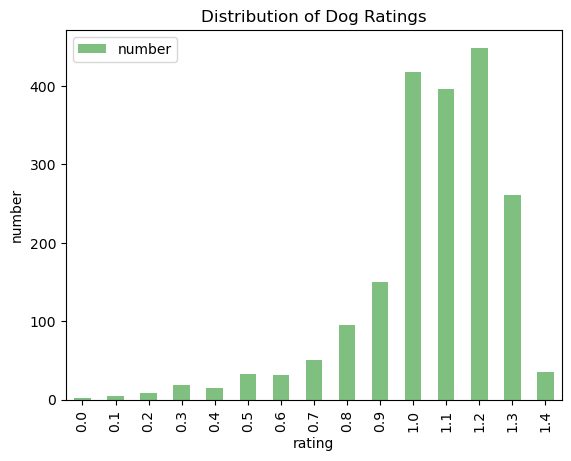

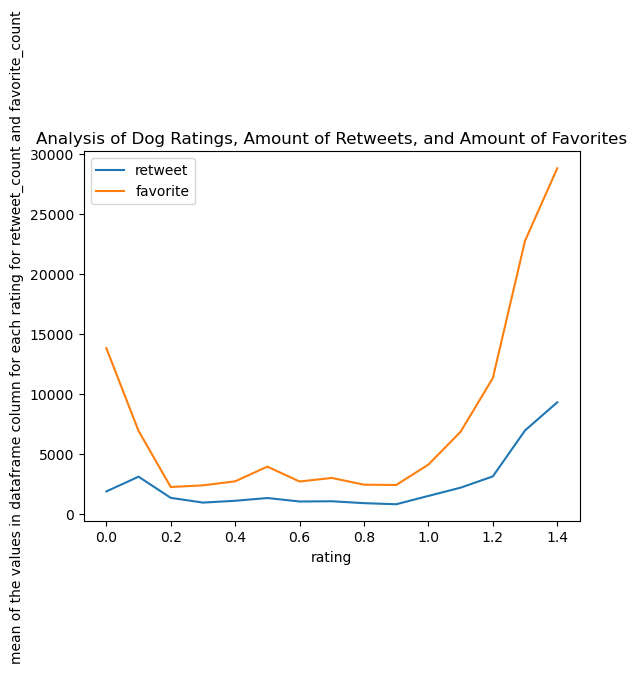

In [1233]:
# data visualisation

bars = rating_analysis[['rating','number']].plot(x='rating', ylabel='number',kind='bar', color='green', alpha=.5, linestyle='--', title='Distribution of Dog Ratings')
lines = rating_analysis[['rating','retweet','favorite']].plot(x='rating', ylabel='mean of the values in dataframe column for each rating for retweet_count and favorite_count', title='Analysis of Dog Ratings, Amount of Retweets, and Amount of Favorites')


<AxesSubplot:title={'center':'Dog step_of_development-Rating Analysis'}, xlabel='step_of_development', ylabel='rating'>

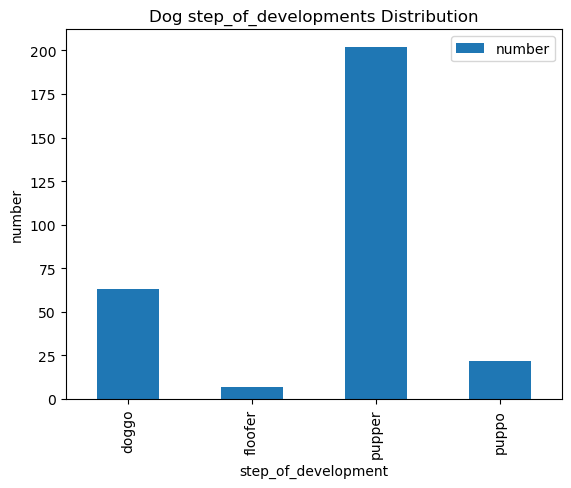

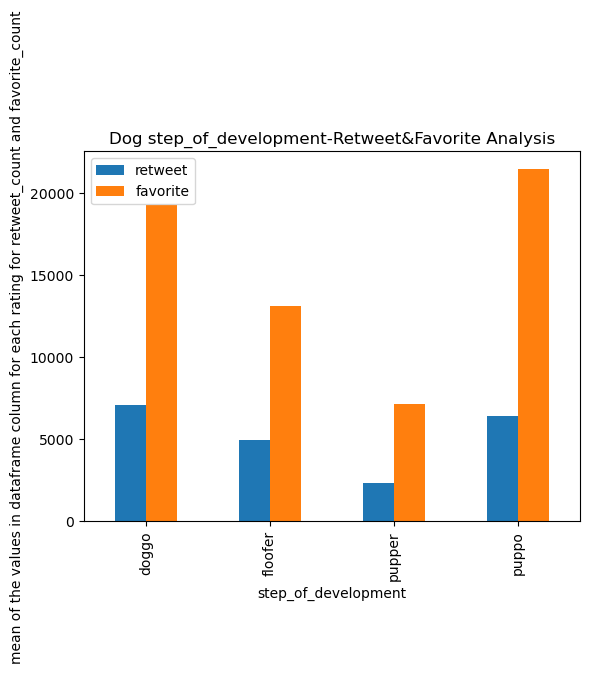

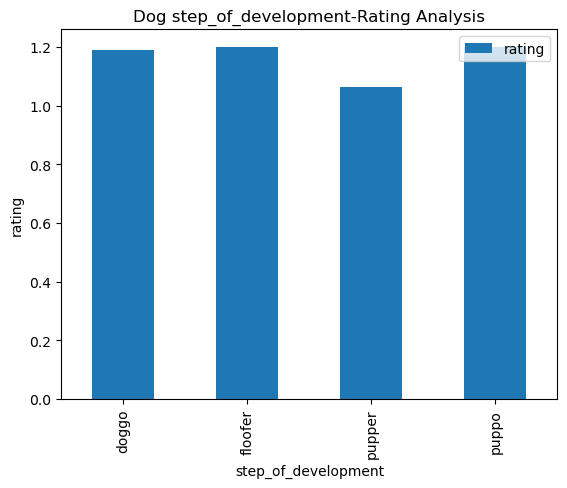

In [1234]:
step_of_development_analyze=pd.DataFrame(columns=['step_of_development','number','rating','retweet','favorite'])
step_of_development_analyze['step_of_development']=['doggo','floofer','pupper','puppo']
for each_step_of_development in step_of_development_analyze.step_of_development:
    step_of_development_df=df_twitter_archive_clean[df_twitter_archive_clean.step_of_development==each_step_of_development]
    step_of_development_analyze.loc[step_of_development_analyze.step_of_development== each_step_of_development,'number']=step_of_development_df.shape[0]
    step_of_development_analyze.loc[step_of_development_analyze.step_of_development== each_step_of_development,'rating']=step_of_development_df['rating'].mean()
    step_of_development_analyze.loc[step_of_development_analyze.step_of_development== each_step_of_development,'retweet']=step_of_development_df['retweet_count'].mean()
    step_of_development_analyze.loc[step_of_development_analyze.step_of_development== each_step_of_development,'favorite']=step_of_development_df['favorite_count'].mean()
step_of_development_analyze[['step_of_development','number']].plot(x='step_of_development',ylabel='number',kind='bar',title='Dog step_of_developments Distribution')
step_of_development_analyze[['step_of_development','retweet','favorite']].plot(x='step_of_development',ylabel='mean of the values in dataframe column for each rating for retweet_count and favorite_count',kind='bar',title='Dog step_of_development-Retweet&Favorite Analysis')
step_of_development_analyze[['step_of_development','rating']].plot(x='step_of_development',ylabel='rating',kind='bar',title='Dog step_of_development-Rating Analysis')

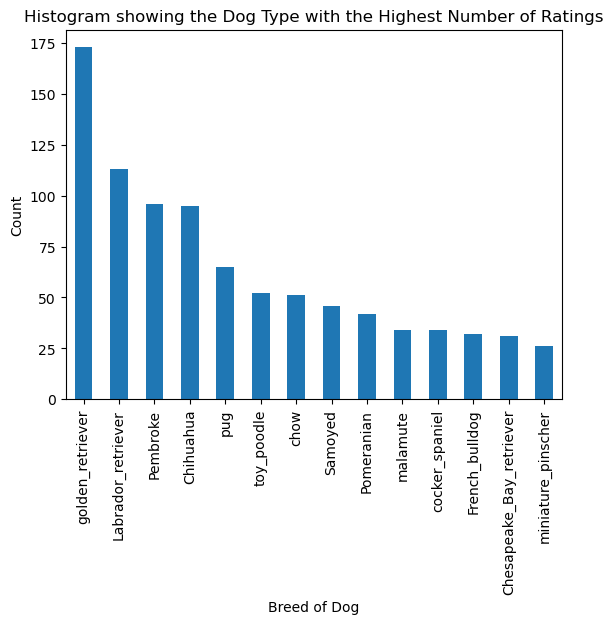

In [1235]:
# Analyzize the favorite dog type of the community, min 25 counts to make the histogram display visibly

favorite_dog_analysis = df_tweet_image_predictions_clean.groupby('pred_race').filter(lambda x: len(x) >= 25)
# counts number of each redicted dog race and plots it in bar histogram
favorite_dog_analysis['pred_race'].value_counts().plot(kind = 'bar')
plt.title('Histogram showing the Dog Type with the Highest Number of Ratings')
plt.xlabel('Breed of Dog')
plt.ylabel('Count')
# Get the current figure.
dog_type_histogram = plt.gcf()


### Observations or Findings

- The Golden retriever ist the most favorite dog type as it gets the highest count.
- The mean rating is 1.055, and the three most frequent ratings are 1.0, 1.1, and 1.2. As the rating becomes more extreme, its frequency decreases.
- Posts with highly-rated content tend to receive a greater number of favorites and retweets. Among these, posts with a rating of 1.4 achieve the highest counts of both favorites and retweets.
- Of the four dog development stages, "pupper" is the most frequently mentioned. However, it also receives the lowest numbers of favorites, retweets, and ratings.
- Doggo and Puppo get the most retweets.

### Sources
- github
- stackoverflow
- chatgpt